OPTIONS PRICING CALCULATOR


Enter option type (call/put):  call

Enter current stock price (S): $ 100
Enter strike price (K): $ 120
Enter time to maturity in years (T):  0.5
Enter risk-free rate (e.g., 0.05 for 5%):  0.03
Enter volatility (e.g., 0.2 for 20%):  0.2
Enter dividend yield (default 0):  



Black-Scholes Price: $0.8914

Monte Carlo Simulation Results:
Simulations     Price           Standard Error  MC_BS_diff
10,000          $0.9326          ±$0.0381          $0.0412
60,000          $0.8848          ±$0.0147          $0.0066
110,000         $0.8854          ±$0.0108          $0.0060
160,000         $0.8977          ±$0.0091          $0.0063
210,000         $0.8906          ±$0.0079          $0.0008
260,000         $0.8921          ±$0.0071          $0.0007
310,000         $0.8942          ±$0.0065          $0.0028
360,000         $0.8934          ±$0.0060          $0.0020
410,000         $0.8910          ±$0.0056          $0.0004
460,000         $0.8948          ±$0.0054          $0.0034
510,000         $0.8836          ±$0.0050          $0.0078
560,000         $0.8953          ±$0.0048          $0.0039
610,000         $0.8870          ±$0.0046          $0.0044
660,000         $0.8979          ±$0.0045          $0.0065
710,000         $0.8885          ±$0.0043          $

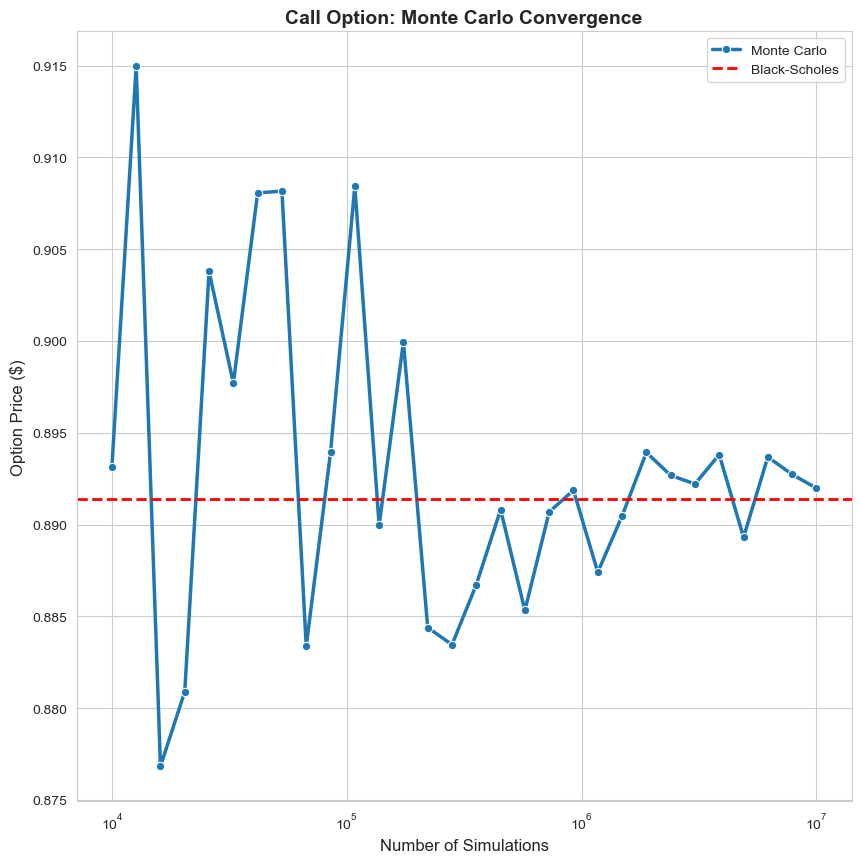

In [59]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from scipy.stats import norm
import matplotlib.pyplot as plt

    
    
   # Here we are comparing the option price computed using the
   # black-scholes model (https://en.wikipedia.org/wiki/Black–Scholes_model) 
   # with the predictions from Monte-Carlo Simulations
    
    
   # These are the parameters that will be used in the model 
    
   # S = share price 
    
   # K = strike price (https://en.wikipedia.org/wiki/Strike_price) 
    
   # T = time to maturity in years 
    
   # r = risk-free rate (https://en.wikipedia.org/wiki/Interest_rate)
    
   # y = dividend yield  (https://en.wikipedia.org/wiki/Dividend_yield)
    
   # sigma = Volatility  (https://en.wikipedia.org/wiki/Volatility_(finance))
    
   # option= call or put (https://en.wikipedia.org/wiki/Option_(finance)) 
    


def black_scholes_option(S, K, T, r, y, sigma, option):
    
    
    "Here we are calculating parameters of the black-scholes equation"

    d1= (np.log(S /K) + (r-y + 0.5*sigma**2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    
    if option=="call":
        price = S* np.exp(-y*T)* norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price= K* np.exp(-r*T)* norm.cdf(-d2) - S* np.exp(-y*T)* norm.cdf(-d1)
       
    return price


def monte_carlo_option_pricing(S, K, T, r, y, sigma, num_simulations=10000, option='call'):
   
   
    Z = np.random.standard_normal(num_simulations)

    "ST = The stock price at maturity"
    
    ST = S * np.exp((r - y - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    
    
    if option == 'call':
        payoff = np.maximum(ST - K, 0)
    else:  
        payoff = np.maximum(K - ST, 0)
    
    # Discount back to present value
    price = np.exp(-r * T) * np.mean(payoff)
    
    std_error = np.exp(-r * T) * np.std(payoff) / np.sqrt(num_simulations)
    
    return price, std_error

def get_user_input():
    """Get option parameters interactively from user"""
    
    print("=" * 60)
    print("OPTIONS PRICING CALCULATOR")
    print("=" * 60)
    
    
    while True:
        option_type = input("Enter option type (call/put): ").lower()
        if option_type in ['call', 'put']:
            break
        print("Error: Please enter 'call' or 'put'!")
         
    while True:
        try:
            S = float(input("\nEnter current stock price (S): $"))
            if S <= 0:
                print("Error: Stock price must be positive!")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number!")
    
    while True:
        try:
            K = float(input("Enter strike price (K): $"))
            if K <= 0:
                print("Error: Strike price must be positive!")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number!")
    
    while True:
        try:
            T = float(input("Enter time to maturity in years (T): "))
            if T <= 0:
                print("Error: Time must be positive!")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number!")
    
    while True:
        try:
            r = float(input("Enter risk-free rate (e.g., 0.05 for 5%): "))
            break
        except ValueError:
            print("Error: Please enter a valid number!")
    
    while True:
        try:
            sigma = float(input("Enter volatility (e.g., 0.2 for 20%): "))
            if sigma <= 0:
                print("Error: Volatility must be positive!")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number!")
    
    while True:
        try:
            y = float(input("Enter dividend yield (default 0): ") or "0")
            break
        except ValueError:
            print("Error: Please enter a valid number!")
    
    return S, K, T, r, sigma, y, option_type
    
def compare_methods():
    
    S, K, T, r, sigma, y, option = get_user_input()
    
    # Calculate option prices using Black-Scholes model 
    BS_call_price = black_scholes_option(S, K, T, r, y, sigma,'call')
    BS_put_price = black_scholes_option(S, K, T, r, y, sigma,'put')
    
    # Calculate using Monte Carlo with different simulation sizes
    path_nums = range(10**4,10**6,5*10**4)

    if option=="call":
     #   print("\n" + "=" * 100)
     #   print("CALL OPTION PRICING")
     #   print("=" * 100)
        print(f"\nBlack-Scholes Price: ${BS_call_price:.4f}")
        print("\nMonte Carlo Simulation Results:")
        print(f"{'Simulations':<15} {'Price':<15} {'Standard Error':<15} {'MC_BS_diff':}")
     #   print("-" * 100)
    
        for i in path_nums:
            mc_price, std_error = monte_carlo_option_pricing(S, K, T, r, y, sigma, i, 'call')
            error = abs(mc_price - BS_call_price)
            print(f"{i:<15,} ${mc_price:<15.4f} ±${std_error:<15.4f} ${error:.4f}")

        visualize_convergence(S, K, T, r, y, sigma, option, BS_call_price )

    else:
        print("\n" + "=" * 70)
        print("PUT OPTION PRICING")
        print("=" * 70)
        print(f"\nBlack-Scholes Price: ${BS_put_price:.4f}")
        print("\nMonte Carlo Simulation Results:")
        print(f"{'Simulations':<15} {'Price':<15} {'Standard Error':<15} {'MC_BS_diff':<15}")
        print("-" * 70)
    
        for i in path_nums:
            mc_price, std_error = monte_carlo_option_pricing(S, K, T, r, y, sigma, i, 'put')
            error = abs(mc_price - BS_put_price)
            print(f"{i:<15,} ${mc_price:<15.4f} ±${std_error:<15.4f} ${error:.4f}")
    
        visualize_convergence(S, K, T, r, y, sigma, option, BS_put_price)
    
    
   # print("\n" + "=" * 100)
   # print("CONCLUSION:")
   # print("=" * 100)
   # print("As the number of simulations increases, the Monte Carlo estimate")
   # print("converges to the Black-Scholes analytical solution.")
   # print("The standard error decreases with √n simulations.")
   # print("=" * 100)

def visualize_convergence(S, K, T, r, y, sigma, option, price):
    """
    Visualize how Monte Carlo converges to Black-Scholes
    """
    simulation_points = np.logspace(4, 7, 30, dtype=int)  # 1,000 to 1,000,000
    MC_call_prices = []
    MC_put_prices = []

    sns.set_style("whitegrid")
    
    if option=="call":
        
        for num in simulation_points:
            
            MC_call, _ = monte_carlo_option_pricing(S, K, T, r, y, sigma, num, 'call')
        
            MC_call_prices.append(MC_call)
  

        print("\n"*3 )
        
        fig = plt.figure(figsize=(10, 10))
        ax1 = fig.add_subplot(111)

        
        sns.lineplot(x=simulation_points, y=MC_call_prices, marker='o', 
             ax=ax1, label='Monte Carlo', linewidth=2.5)
        ax1.axhline(y=price, color='red', linestyle='--', linewidth=2, label='Black-Scholes')
        ax1.set_xscale('log')
        ax1.set_xlabel('Number of Simulations', fontsize=12)
        ax1.set_ylabel('Option Price ($)', fontsize=12)
        ax1.set_title('Call Option: Monte Carlo Convergence', fontsize=14, fontweight='bold')
        ax1.legend()
        
    else:
        
        for num in simulation_points:
           
            MC_put, _ = monte_carlo_option_pricing(S, K, T, r, y, sigma, num, 'put')
    
            MC_put_prices.append(MC_put)

        print("\n*3")
        
        fig = plt.figure(figsize=(10, 10))
        ax2 = fig.add_subplot(111)
        
        sns.lineplot(x=simulation_points, y=MC_put_prices, marker='o', 
             ax=ax2, label='Monte Carlo', linewidth=2.5)
        ax2.axhline(y=price, color='red', linestyle='--', linewidth=2, label='Black-Scholes')
        ax2.set_xscale('log')
        ax2.set_xlabel('Number of Simulations', fontsize=12)
        ax2.set_ylabel('Option Price ($)', fontsize=12)
        ax2.set_title('Put Option: Monte Carlo Convergence', fontsize=14, fontweight='bold')
        ax2.legend()

    

if __name__ == "__main__":
    compare_methods()